In [1]:
import numpy as np
import time
from functools import partial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('ggplot')

DAYS = 100
SEATS = 100

DEMAND_MIN = 100
DEMAND_MAX = 200

In [2]:
def cummulative_revenue(days_left,
                       tickets_left,
                       rev_to_date = 0,
                       demand_min = DEMAND_MIN,
                       demand_max = DEMAND_MAX):
    if days_left > 0 and tickets_left > 0:
        demand = np.random.randint(demand_min, demand_max+1)
        p = pf_optimal(days_left, tickets_left, demand)
        q = demand - p
        q = max(0,q)
        q = min(tickets_left, q)
        
        return cummulative_revenue(days_left = days_left - 1,
                                  tickets_left = tickets_left - q,
                                  rev_to_date = rev_to_date + p*q)
    else:
        return rev_to_date

In [3]:
days_range = list(range(DAYS))
seats_range = list(range(SEATS+1))
demand_range = list(range(DEMAND_MIN, DEMAND_MAX+1))

In [4]:
r_max = np.zeros((len(seats_range), len(demand_range)))
for seats in seats_range:
    for demand in demand_range:
        r_max [seats, demand-DEMAND_MIN] = 0
        for p in range(demand-seats, demand + 1):
            q = (demand - p)
            r = p*q
            if r > r_max[seats, demand-DEMAND_MIN]:
                r_max [seats, demand-DEMAND_MIN] = r

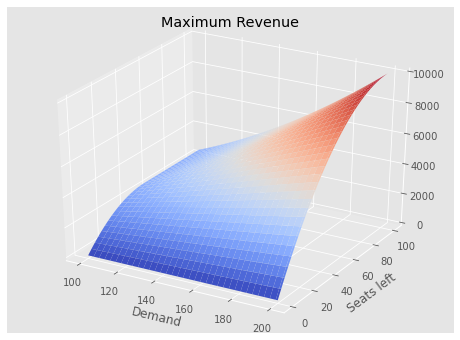

In [5]:
x,y,z = demand_range, seats_range, r_max
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
x,y = np.meshgrid(x,y)
surface = ax.plot_surface(x,y,z, cmap = cm.coolwarm)
plt.xlabel('Demand');
plt.ylabel('Seats left');
plt.title('Maximum Revenue');

Text(0.5, 0, 'seats_left')

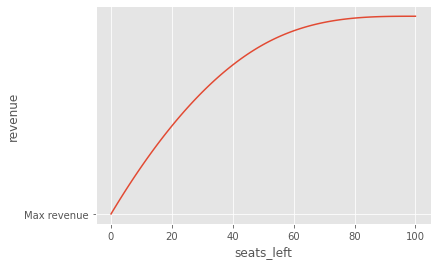

In [6]:
plt.plot(np.nanmean(r_max, axis = 1))
plt.plot('Max revenue')
plt.ylabel('revenue')
plt.xlabel('seats_left')

In [7]:
best_price = np.zeros((len(days_range)+1, len(seats_range), len(demand_range)))
expected_max_revenue = np.zeros((len(days_range)+1, len(seats_range)))

for day in days_range:
    for seats in seats_range:
        for demand in demand_range:
            _best_price, _max_revenue = 0,0
            
            for price in range(demand-seats, demand + 1):
                q = demand - price
                revenue = price*q + expected_max_revenue[day, seats-q]
                if revenue > _max_revenue:
                    _best_price, _max_revenue= price, revenue
#                print(f'day : {day} seats: {seats} demand: {demand} price : {price} exp_max_rev : {expected_max_revenue[day, seats-q]} revenue : {revenue} best_price : {_best_price} max_rev : {_max_revenue}')
                    
            best_price[day+1, seats,demand - DEMAND_MIN] = _best_price
            expected_max_revenue[day+1, seats] += _max_revenue/len(demand_range)
print({day+1})

{100}


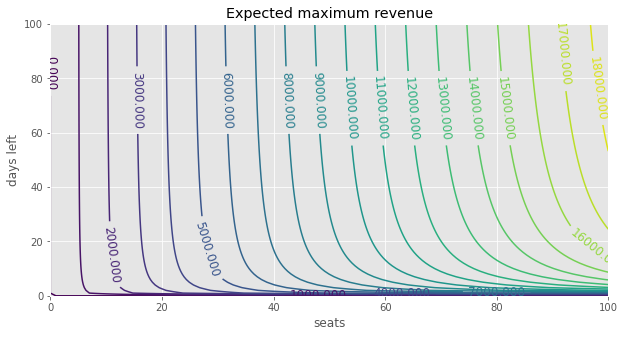

In [8]:
fig = plt.figure(figsize=(10,5))
CS = plt.contour(days_range+[100], seats_range, expected_max_revenue, levels = 20)
plt.clabel(CS, inline=1, fontsize =12)
plt.xlabel('seats');
plt.ylabel('days left');
plt.title('Expected maximum revenue');

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   2.,   2.,   0.,   1.,   2.,   1.,
          0.,   1.,   2.,   2.,   2.,   0.,   2.,   2.,   4.,   0.,   4.,
          4.,   1.,   1.,   4.,   2.,   3.,   4.,   4.,   4.,   6.,   3.,
          7.,   5.,   5.,  13.,  10.,  13.,   7.,  21.,  20.,  26.,  17.,
         20.,  31.,  29.,  41.,  39.,  54.,  55.,  51.,  74.,  92.,  95.,
        113., 123., 146., 145., 200., 153., 217., 261., 273., 309., 324.,
        382., 351., 429., 443., 491., 483., 506., 544., 503., 495., 468.,
        401., 388., 255., 257., 182., 150.,  86.,  60.,  41.,  21.,   6.,
          2.]),
 array([16686.  , 16709.58, 16733.16, 16756.74, 16780.32, 16803.9 ,
        16827.48, 16851.06, 16874.64, 16898.22, 16921.8 , 16945.38,
        16968.96, 16992.54, 17016.12, 17039.7 , 17063.28, 17086.86,
        17110.44, 17134.02, 17157.6 , 17181.18, 17204.76, 17228.34,
        17251.92, 17275.5 , 17299.08, 17322.66

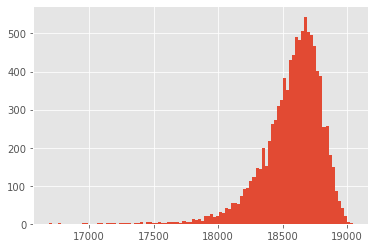

In [9]:
def pf_optimal(days_left, tickets_left, demand_level):
    return best_price[days_left,int(tickets_left), int(demand_level - DEMAND_MIN)]


sim = [cummulative_revenue(days_left=DAYS,tickets_left=SEATS) for _ in range(10000)]
plt.hist(sim, bins = 100)
#plt.title(f'Revenue mean: {np.mean(sim):,.0f} std: {np.std(sim):,0.0f}')

In [10]:
r1 = expected_max_revenue[100,100]
r2 = expected_max_revenue[14,50]
r3 = expected_max_revenue[2,20]
r4 = expected_max_revenue[1,3]
avg_revenue = np.mean([r1,r2,r3,r4])

print(int(r1))
print(int(r2))
print(int(r3))
print(int(r4))
print(int(avg_revenue))

18574
8492
2905
441
7603
